In [134]:
import cmdstanpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import arviz as az

plt.rcParams['axes.labelsize'] = 25
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['figure.figsize'] = (11, 7)

In [4]:
data = pd.read_csv('./islands.csv', delimiter=';')
data

,culture,population,contact,total_tools,mean_TU
0,Malekula,1100,low,13,3.2
1,Tikopia,1500,low,22,4.7
2,Santa Cruz,3600,low,24,4.0
3,Yap,4791,high,43,5.0
4,Lau Fiji,7400,high,33,5.0
5,Trobriand,8000,high,19,4.0
6,Chuuk,9200,high,40,3.8
7,Manus,13000,low,28,6.6
8,Tonga,17500,high,55,5.4
9,Hawaii,275000,low,71,6.6


In [140]:
distances = np.loadtxt('./island_distance_matrices.csv', skiprows=1, delimiter=',')
distances

array([[0.   , 0.475, 0.631, 4.363, 1.234, 2.036, 3.178, 2.794, 1.86 ,
        5.678],
       [0.475, 0.   , 0.315, 4.173, 1.236, 2.007, 2.877, 2.67 , 1.965,
        5.283],
       [0.631, 0.315, 0.   , 3.859, 1.55 , 1.708, 2.588, 2.356, 2.279,
        5.401],
       [4.363, 4.173, 3.859, 0.   , 5.391, 2.462, 1.555, 1.616, 6.136,
        7.178],
       [1.234, 1.236, 1.55 , 5.391, 0.   , 3.219, 4.027, 3.906, 0.763,
        4.884],
       [2.036, 2.007, 1.708, 2.462, 3.219, 0.   , 1.801, 0.85 , 3.893,
        6.653],
       [3.178, 2.877, 2.588, 1.555, 4.027, 1.801, 0.   , 1.213, 4.789,
        5.787],
       [2.794, 2.67 , 2.356, 1.616, 3.906, 0.85 , 1.213, 0.   , 4.622,
        6.722],
       [1.86 , 1.965, 2.279, 6.136, 0.763, 3.893, 4.789, 4.622, 0.   ,
        5.037],
       [5.678, 5.283, 5.401, 7.178, 4.884, 6.653, 5.787, 6.722, 5.037,
        0.   ]])

In [34]:
sm = cmdstanpy.CmdStanModel(stan_file='./islands.stan')

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:compiled model file: /home/js/programs/misc/islands/islands


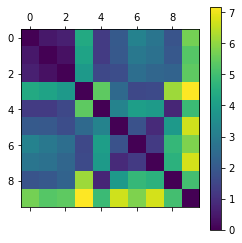

In [27]:
plt.matshow(distances)
plt.colorbar()

In [33]:
standata = dict(
    n = len(data),
    population = data['population'].to_numpy(),
    tools = data['total_tools'].to_numpy(),
    distances = distances,
)

In [45]:
fit = sm.sample(standata, parallel_chains=4, show_progress='notebook')

Chain 1 - warmup:   0%|          | 0/1 [00:00<?, ?it/s]

Chain 2 - warmup:   0%|          | 0/1 [00:00<?, ?it/s]

Chain 3 - warmup:   0%|          | 0/1 [00:00<?, ?it/s]

Chain 4 - warmup:   0%|          | 0/1 [00:00<?, ?it/s]

In [46]:
fit.diagnose()

INFO:cmdstanpy:Processing csv files: /tmp/tmpmuoyra5v/islands-202112171806-1-tiad_aq2.csv, /tmp/tmpmuoyra5v/islands-202112171806-2-1xlwuzh_.csv, /tmp/tmpmuoyra5v/islands-202112171806-3-u_3ubtzp.csv, /tmp/tmpmuoyra5v/islands-202112171806-4-ustebhe_.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.


'Processing csv files: /tmp/tmpmuoyra5v/islands-202112171806-1-tiad_aq2.csv, /tmp/tmpmuoyra5v/islands-202112171806-2-1xlwuzh_.csv, /tmp/tmpmuoyra5v/islands-202112171806-3-u_3ubtzp.csv, /tmp/tmpmuoyra5v/islands-202112171806-4-ustebhe_.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\nNo divergent transitions found.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete, no problems detected.'

In [47]:
samples = fit.stan_variables()
samples.keys()

dict_keys(['k', 'p_alpha', 'p_beta', 'p_gamma', 'eta_sq', 'rho_sq', 'expected_tools', 'K'])

Text(0.5, 0, 'Tools')

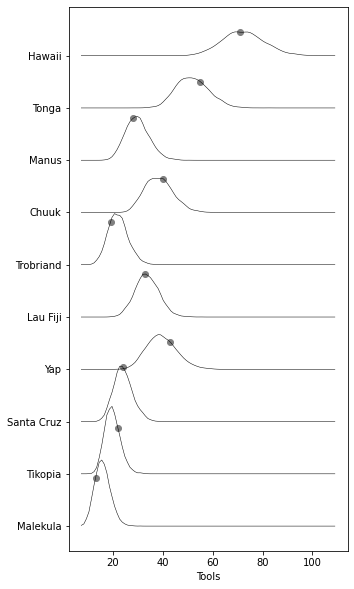

In [83]:
plt.figure(figsize=(5, 10))
xx = np.linspace(*np.percentile(samples['expected_tools'], [0, 100]), 100)
for i in range(len(data)):
    _kde = stats.kde.gaussian_kde(samples['expected_tools'][:,i])
    kde = lambda x: _kde(x) * 10
    curve = kde(xx)
    # yy = base + curve / 4
    # plt.fill_between(xx, base, yy, color=palette[0], alpha=0.5, zorder=-i * 2)
    plt.plot(xx, curve + i, c='k', lw=0.5)
    plt.scatter(data['total_tools'][i], kde(data['total_tools'][i]) + i, c='grey')
plt.yticks(range(len(data)), labels=data['culture']);
plt.xlabel('Tools')

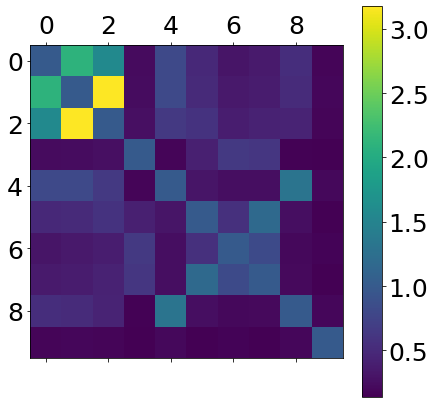

In [142]:
plt.matshow(1/(distances + np.eye(10)))
plt.colorbar()

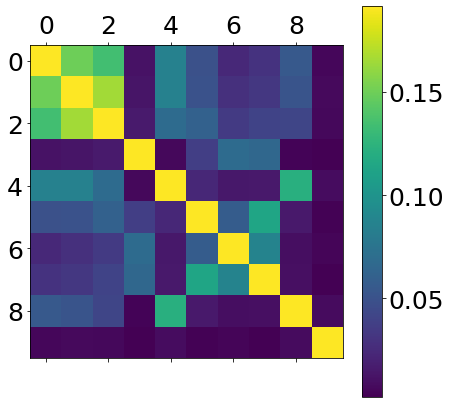

In [143]:
plt.matshow(samples['K'].mean(axis=0))
plt.colorbar()

array([[<AxesSubplot:ylabel='p_beta'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:ylabel='p_gamma'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:ylabel='eta_sq'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:xlabel='p_alpha', ylabel='rho_sq'>,
        <AxesSubplot:xlabel='p_beta'>, <AxesSubplot:xlabel='p_gamma'>,
        <AxesSubplot:xlabel='eta_sq'>]], dtype=object)

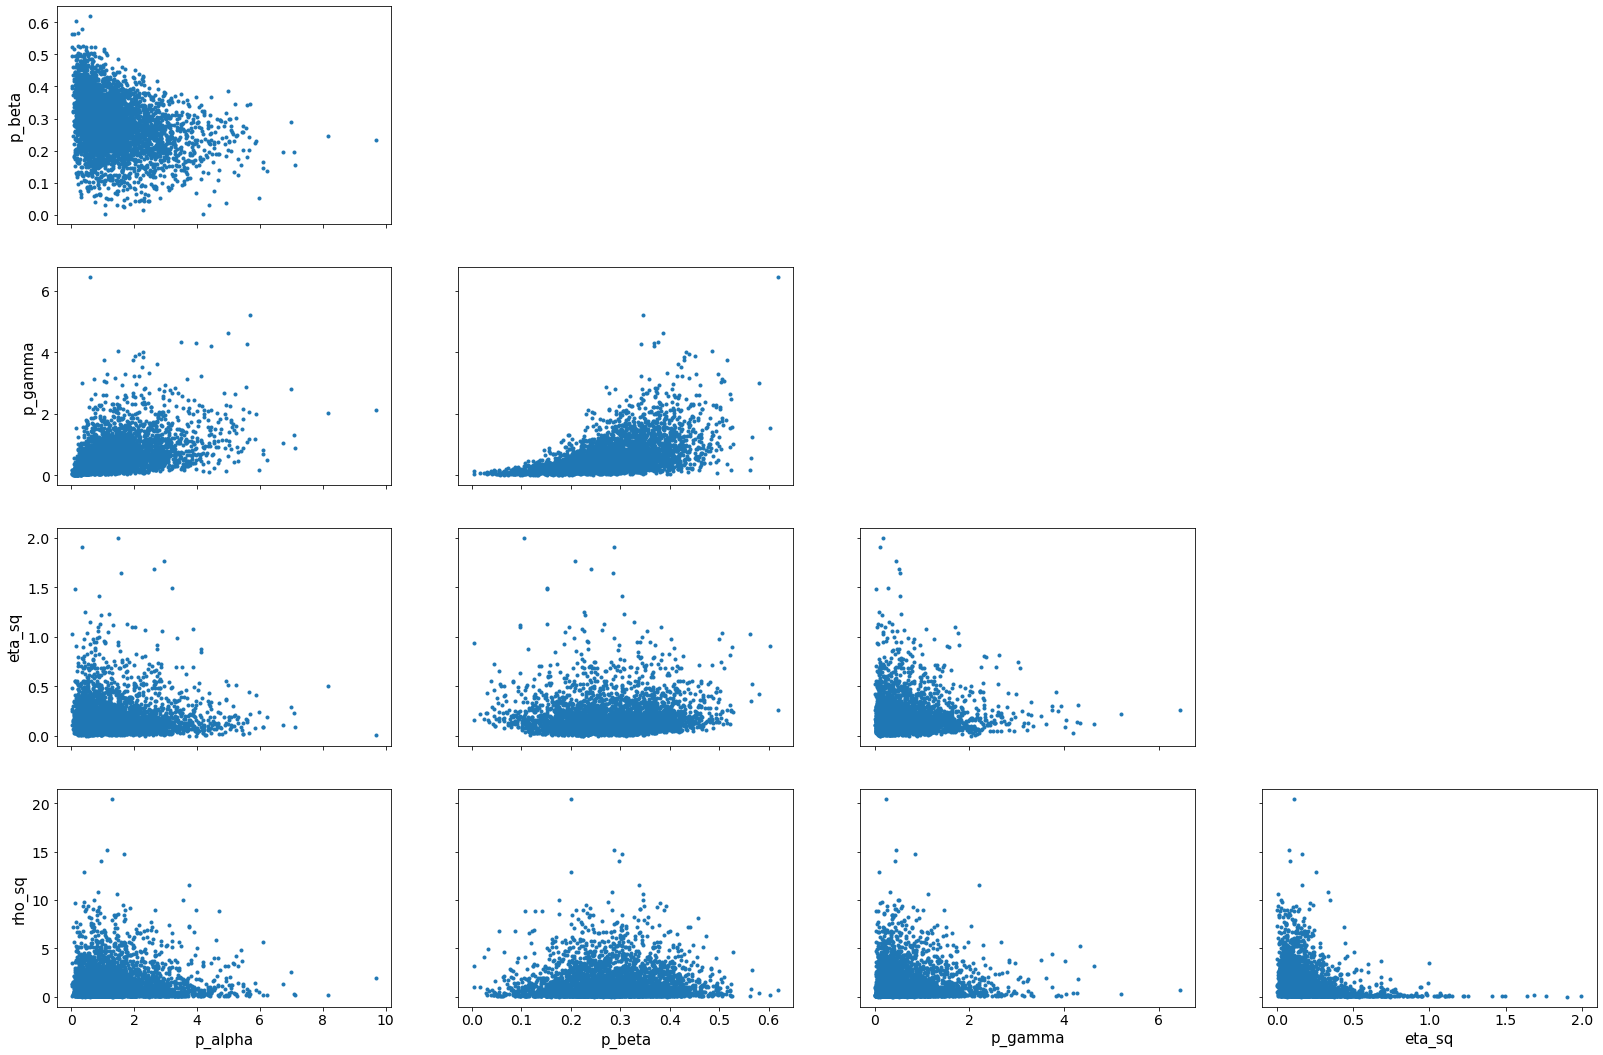

In [107]:
az.plot_pair(samples, var_names=['p_alpha', 'p_beta', 'p_gamma', 'eta_sq', 'rho_sq'])

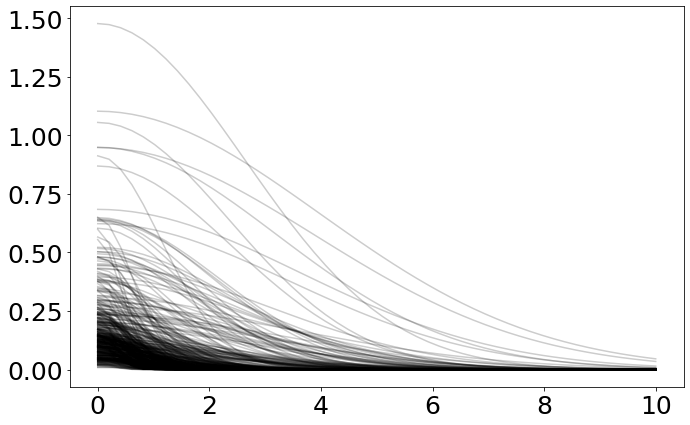

In [141]:
xdistances = np.linspace(0, 10).reshape(-1, 1) 
sim_K = samples['eta_sq'] * np.exp(-samples['rho_sq'] * xdistances**2)
# for i in sim_K[:10]:
# plt.plot(distances, sim_K)
for i in range(500):
    plt.plot(xdistances, sim_K[:,i], c='k', alpha=0.2)